# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import zipfile

In [2]:
# Viz mantra
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:
# your answer here
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [4]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [5]:
# your answer here
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

temp consists of 3 columns with City, State being strings values and Temperature contaning float values

#### Select the rows where state is New York

In [6]:
# your answer here
temp[temp.State=='New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [7]:
# your answer here
round(temp[temp.State=='New York']['Temperature'].mean(),2)

10.74

#### We want to know cities and states with Temperature above 15 degress Celcius

In [8]:
# your answer here
temp[temp.Temperature>15][['City', 'State']]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [9]:
# your answer here
list(temp[temp.Temperature>15]['City'])

['NYC', 'Hartford', 'Treton', 'Newark']

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [10]:
# your answer here
list(temp[(temp.Temperature>15) & (temp.Temperature<20)]['City'])

['NYC', 'Hartford']

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [11]:
# your answer here
temp_2 = temp.groupby('State', as_index=False).agg({'Temperature':[np.mean, np.std]})
temp_2.columns = ['State', 'Mean', 'Standard Deviation']
temp_2

,State,Mean,Standard Deviation
0,Connecticut,15.833333,1.964186
1,New Jersey,21.111111,1.571348
2,New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [12]:
# your answer here
employee = pd.read_csv('employee.csv')
employee.sample()

,Name,Department,Education,Gender,Title,Years,Salary
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [13]:
# your answer here
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

It consists of 5 string value columns and 2 integer value columns

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [14]:
employee.Salary

0    35
1    30
2    30
3    35
4    55
5    55
6    70
7    60
8    70
Name: Salary, dtype: int64

array([[<AxesSubplot:title={'center':'Years'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

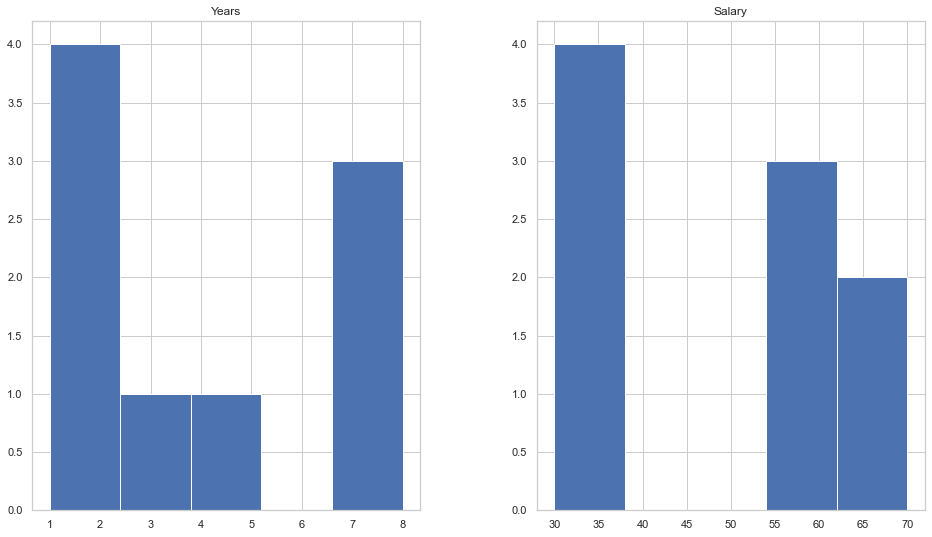

In [15]:
# your answer here
employee.hist(bins='auto')

Years is distributed between 1 and 5 with 7 and 8 being outliers.
Salary is split into 2 groups, between 30 and 40 and 50 and 70

#### What's the average salary in this company?

In [16]:
# your answer here
round(employee.Salary.mean(),2)

48.89

#### What's the highest salary?

In [17]:
# your answer here
round(employee.Salary.max(),2)

70

#### What's the lowest salary?

In [18]:
# your answer here
round(employee.Salary.min(),2)

30

#### Who are the employees with the lowest salary?

In [19]:
# your answer here
list(employee[employee.Salary==employee.Salary.min()]['Name'])

['Maria', 'David']

#### Could you give all the information about an employee called David?

In [20]:
# your answer here
employee[employee.Name=='David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [21]:
# your answer here
print(employee[employee.Name=='David']['Salary'].values)

[30]


#### Print all the rows where job title is associate

In [22]:
# your answer here
employee[employee.Title=='associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [23]:
# your answer here- 1 method
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [24]:
# your answer here- 2nd method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [25]:
# your answer here
employee[(employee.Title=='associate') & (employee.Salary>55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [26]:
# your answer here
employee.groupby('Years', as_index=False).agg({'Salary':[np.mean]})

,Years,Salary
,,mean
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average Salary per title?

In [27]:
# your answer here
employee.groupby('Title', as_index=False).agg({'Salary':[np.mean]})

,Title,Salary
,,mean
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

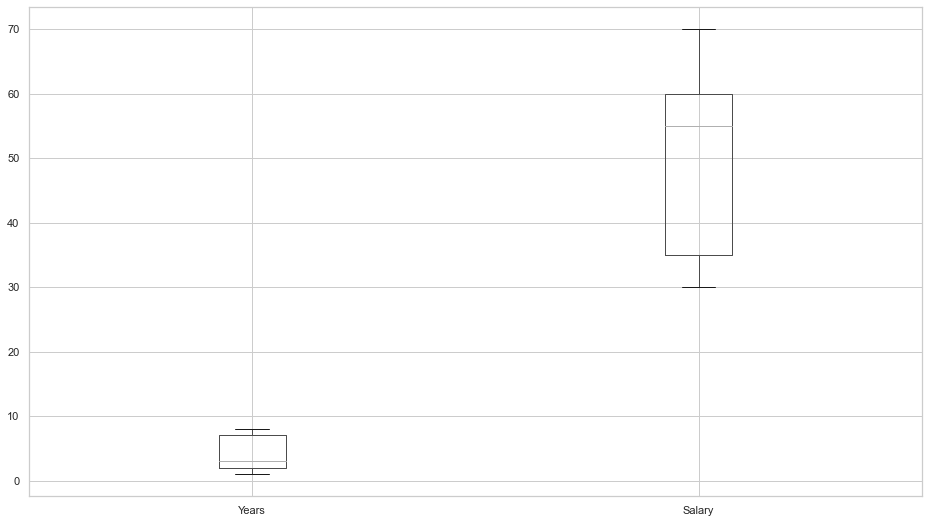

In [28]:
# draw boxplot here
employee.boxplot();

In [29]:
# print first quartile here
employee.describe().loc['25%']

Years      2.0
Salary    35.0
Name: 25%, dtype: float64

In [30]:
# print third quartile here
employee.describe().loc['75%']

Years      7.0
Salary    60.0
Name: 75%, dtype: float64

#### Is the mean salary per gender different?

In [31]:
# your answer here
employee.groupby('Gender', as_index=False).agg({'Salary':[np.mean]})

,Gender,Salary
,,mean
0,F,47.5
1,M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [32]:
# your answer here
employee.groupby('Department', as_index=False).agg({'Years':[np.min, np.mean, np.max],
                                                    'Salary':[np.min, np.mean, np.max]})

Department Years                Salary            
              amin      mean amax   amin   mean amax
0         HR     2  4.666667    8     30  45.00   70
1         IT     1  4.500000    8     30  48.75   70
2      Sales     2  2.500000    3     55  55.00   55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [33]:
# your answer here
bonus = employee.groupby('Department', as_index=False).agg({'Salary':[lambda x: np.max(x)-np.min(x)]})
bonus.columns = ['Department','Difference']
bonus

,Department,Difference
0,HR,40
1,IT,40
2,Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [34]:
# your answer here
zf = zipfile.ZipFile('Orders.zip') #Unzipping file
orders = pd.read_csv(zf.open('Orders.csv')) # To read the temp zip file we have to 'open it'
zf.close() #we can close it because we don't need it anymore
orders.sample()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
353044,479493,577167,23322,2011,11,5,10,large white heart of wicker,3,2011-11-18 10:41:00,2.95,16511,United Kingdom,8.85


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [35]:
# your answer here
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [36]:
# your answer here
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [37]:
orders.shape

(397924, 14)

It has 14 columns of which 10 are float and 4 are objects (strings)

####  What is the average Purchase Price?

In [38]:
# your answer here
round(orders.amount_spent.mean(),2)

22.39

#### What were the highest and lowest purchase prices? 

In [39]:
# your answer here
orders.amount_spent.max()

168469.6

In [40]:
# your answer here
orders.amount_spent.min()

0.0

#### Select all the customers we have in Spain

In [41]:
# your answer here
spain = orders[orders.Country=='Spain']
spain_customers = orders[orders.Country=='Spain']['CustomerID'].unique()
spain_customers

array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442])

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [42]:
#customers in Spain
len(spain_customers)

30

In [43]:
# your answer here
#orders from spain
spain.shape[0]

2485

In [44]:
#method 2
#orders from spain
print(spain['Country'].value_counts().values)

[2485]


#### Select all the customers who have bought more than 50 items ?

In [45]:
# your answer here
spenders = orders.groupby('CustomerID', as_index=False).agg({'Quantity': sum})
spenders.columns = ['CustomerID', 'Total Quantity']
spenders = spenders[spenders['Total Quantity']>50]
spenders.sample()
# orders[orders.CustomerID.isin(spenders.CustomerID)]

,CustomerID,Total Quantity
753,13345,141


#### Select orders from Spain that are above 50 items

In [46]:
# your answer here
orders[(orders.Country=='Spain') & (orders.Quantity>50)].sample()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
197169,282908,561669,23294,2011,7,4,17,set of 6 snack loaf baking cases,128,2011-07-28 17:09:00,0.72,12507,Spain,92.16


#### Select all free orders

In [47]:
orders[orders.amount_spent==0].sample()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
334242,454463,575579,22437,2011,11,4,11,set of 9 black skull balloons,20,2011-11-10 11:49:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [48]:
# your answer here
orders[orders.Description.apply(lambda x: 'lunch bag' in x )].sample()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
122799,179525,552279,23208,2011,5,7,12,lunch bag vintage leaf design,10,2011-05-08 12:38:00,1.65,15117,United Kingdom,16.5


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [49]:
# your answer here
orders[ ( orders.year==2011 ) & ( orders.Description.apply( lambda x: 'lunch bag' in x ) ) ].sample()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
74810,115133,546107,20726,2011,3,3,12,lunch bag woodland,1,2011-03-09 12:33:00,1.65,17238,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

<AxesSubplot:>

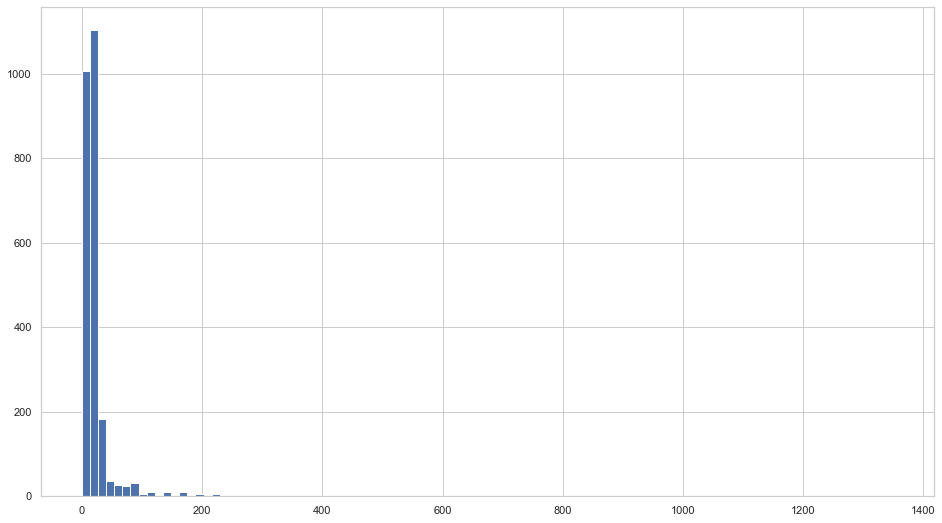

In [50]:
# your answer here
spain = orders[orders.Country=='Spain']
spain_amount_spent = spain['amount_spent'].value_counts()
spain.amount_spent.hist(bins=100)

#### Select all orders made in the month of August

In [51]:
# your answer here
august = orders[orders.month==8]
august.sample()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
213171,302985,563500,21700,2011,8,2,17,big doughnut fridge magnets,12,2011-08-16 17:25:00,0.85,15856,United Kingdom,10.2


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [52]:
# your answer here
august.Country.value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [53]:
# your answer here
orders.groupby('Country', as_index=False).agg({'amount_spent': np.mean}).head()

,Country,amount_spent
0,Australia,116.895620
1,Austria,25.624824
2,Bahrain,32.258824
3,Belgium,20.283772
4,Brazil,35.737500


#### What's the most expensive item?

In [54]:
# your answer here
orders.UnitPrice.max()

8142.75

#### What was the average amount spent per year ?

In [55]:
# your answer here
orders.groupby('year', as_index=False).agg({'amount_spent': np.mean})

,year,amount_spent
0,2010,21.892733
1,2011,22.430074
